<a href="https://colab.research.google.com/github/elishagretton/Modelling-Biological-Switches/blob/main/Model_(3)_Stochastic_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now we add randomness into the original deterministic model.

TO FIX:
- BIAS for switching time

# Setting up environment

In [3]:
pip install sdeint

  Preparing metadata (setup.py) ... done
  Created wheel for sdeint: filename=sdeint-0.3.0-py3-none-any.whl size=25905 sha256=358eff80f14ba55772fd628e11ee43cbdc8c135c1ead7a41eee0289e94573288
  Stored in directory: /root/.cache/pip/wheels/f9/85/bb/4d274a94104fc3050d1652321aeb6d18b48b9e3cf752a8b32d
Successfully built sdeint


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Example of biological switch using stochastic differential equation

In [5]:
# Define initial conditions and parameters

N = 10000
t_init = 0
t_end = 15
dt = float(t_end - t_init) / N
ts = np.arange(t_init, t_end + dt, dt)
ys = np.zeros(N + 1)
xs = np.zeros(N + 1)
b=0.2
sigma = 0.2

In [6]:
# Define new functions

def dW(delta_t):
    """Random sample normal distribution"""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

def f(X):
    """Hill function with parameters mu=1,theta=0.3,n=3"""
    return 1/(1+pow((X/0.3),3))

In [7]:
# Simulate SDE using Milstein Method

for i in range(1, ts.size):
  t = (i - 1) * dt
  y = ys[i - 1]
  x = xs[i-1]
  xs[i] = x + (-1*x+ f(y))* dt + (1-b)*sigma*x*dW(dt) + 0.5* sigma**2 * x* (dW(dt)**2 - dt)
  ys[i] = y + (-1*y + f(x))* dt + sigma*y*dW(dt) + 0.5* sigma**2 * y* (dW(dt)**2 - dt)

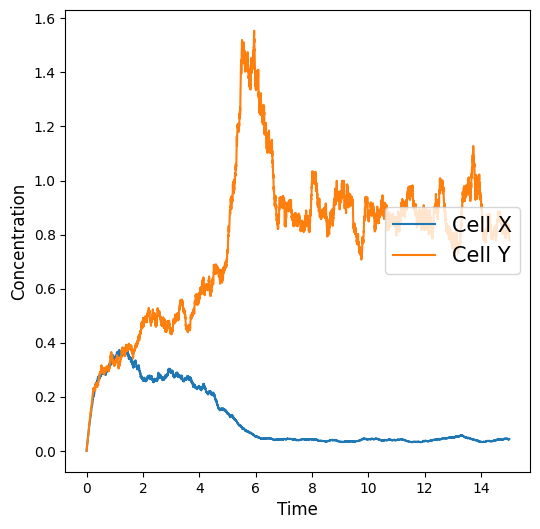

In [8]:
# Plot simulation

fig = plt.figure(figsize=(6, 6))

plt.plot(ts, xs, label="Cell X")
plt.plot(ts, ys,label="Cell Y")

plt.xlabel("Time",fontsize=12)
h = plt.ylabel("Concentration",fontsize=12)

plt.legend(loc=7,prop={"size":15},markerscale=2)
plt.show()

**Observations:**
* The overall shape of a general biological switch is retained, with each
cell splitting off into a region of concentration.
* There are now small fluctuations in the concentrations of both cells
due to the involvement of random noise.

# Simulation of Phase Portait for SDE System

Text(0, 0.5, 'Cell Y Concentration')

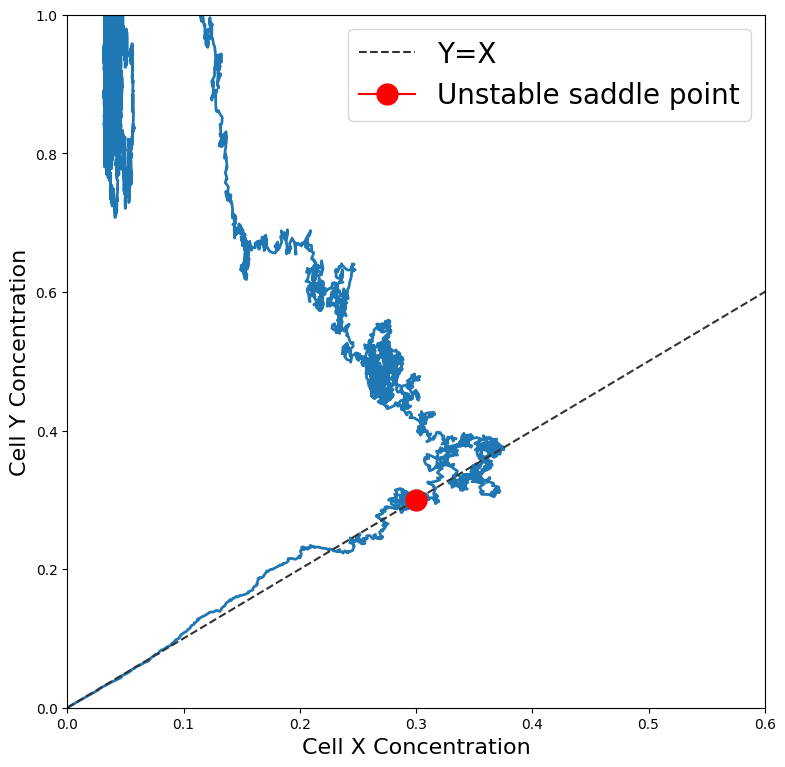

In [9]:
fig, ax = plt.subplots(figsize=(9,9))
plt.plot(xs, ys, lw=2)

X=np.linspace(0,1,10)
plt.plot(X,X,linestyle='--',color='0.2',label='Y=X')
plt.ylim([0,1])
plt.xlim([0,0.6])
ax.plot([0.3],[0.3], marker="o", color = 'red', markeredgecolor="red", markersize=15,label='Unstable saddle point')
ax.legend(prop={"size":20},markerscale=1)
plt.xlabel('Cell X Concentration',fontsize=16)
plt.ylabel('Cell Y Concentration',fontsize=16)

# Investigating the end point

* How does the addition of stochasticity affect the end point of the switch?
* Can we still predict the outcome given its initial conditions?

**How do we do this?**
* Investigate parameters sigma and bias individually.
* Run SDE model 500 times for said parameter.
* For each simulation, note the end point of the system by nothing the cell finishing high in concentration.
* Once the simulations are complete, calculate the perrcentage of times the
cell finishing with a high concentration is cell X. This is called the switching percentage to cell X.
* Plot the change in parameter against the switching percentage.

In [16]:
# First we investigate changing sigma

# Define initial conditions and parameters
N = 10000
t_init = 0
t_end = 15
dt = float(t_end - t_init) / N
ts = np.arange(t_init, t_end + dt, dt)
ys = np.zeros(N + 1)
xs = np.zeros(N + 1)
b=0
sigmas = np.arange(0,0.03,0.001)
num_sims = 50

In [17]:
# Define new functions
def highest_cell(conc_x,conc_y):
  """ Function to test if the end concentration of cell X is larger than cell Y."""
  if conc_x > conc_y:
    return 1
  else:
    return 0

In [19]:
# Simulate SDE using Milstein Method
end_decision = []
cell_x = []
cell_y = []
for k in range(len(sigmas)):
  end_decision=[]
  for j in range(num_sims):
    for i in range(1, ts.size):
      t = (i - 1) * dt
      y = ys[i - 1]
      x = xs[i-1]

      # Milstein method
      xs[i] = x + (-1*x+ f(y))* dt + (1-b)*sigmas[k]*x*dW(dt) + 0.5* sigmas[k]**2 * x* (dW(dt)**2 - dt)
      ys[i] = y + (-1*y + f(x))* dt + sigmas[k]*y*dW(dt) + 0.5* sigmas[k]**2 * y* (dW(dt)**2 - dt)

    # Test end point of system
    high = highest_cell(xs[-1],ys[-1])

    # Add 1 to end_decision array if cell X, add 0 if cell Y
    end_decision.append(high)

  # Add all occurrences system ends with cell X high to cell_x
  cell_x.append(end_decision.count(1))
  # Add all occurrences system ends with cell Y high to cell_y
  cell_y.append(end_decision.count(0))

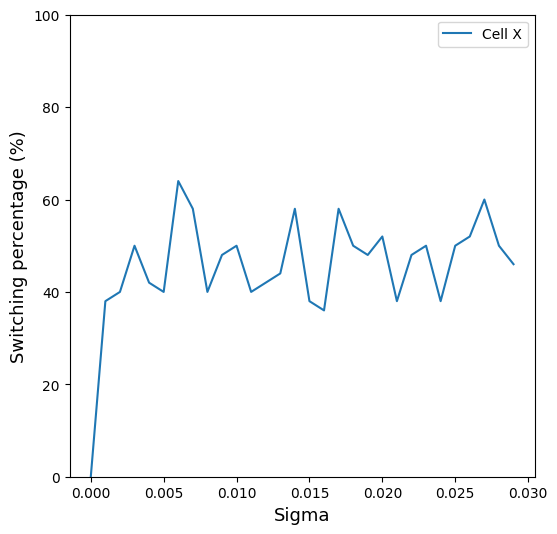

In [20]:
percentages = []
perc_y=[]
fig = plt.figure()
fig.set_size_inches(6,6)

for i in range(len(cell_x)):
  percent_x = (cell_x[i]/(cell_x[i]+cell_y[i]))*100
  percent_y=(cell_y[i]/(cell_x[i]+cell_y[i]))*100
  percentages.append(percent_x)
  perc_y.append(percent_y)
plt.plot(sigmas,percentages,'-',label='Cell X')

plt.ylim(0,100)
plt.xlabel('Sigma',fontsize=13)
plt.ylabel('Switching percentage (%)',fontsize=13)
plt.legend()

**Observations:**
* Increasing sigma shows that the switching percentage to cell X quickly rises to around 50%
* The switching percentage fluctuates between 40-60%.

**Results:**
* This implies noise has no significant effect on the final outcome of the switch.
* This is because noise destroys any prior knowledge of a system's starting point.

In [35]:
# Now we investigate changing the bias on the end point

# Define initial conditions and parameters
N = 10000
t_init = 0
t_end = 15
dt = float(t_end - t_init) / N
ts = np.arange(t_init, t_end + dt, dt)
ys = np.zeros(N + 1)
xs = np.zeros(N + 1)
bs = np.arange(0,0.1,0.001)
sigma = 0.01
num_sims = 50

In [36]:
# Simulate SDE using Milstein Method
end_decision = []
cell_x = []
cell_y = []
for k in range(len(bs)):
  end_decision=[]
  for j in range(num_sims):
    for i in range(1, ts.size):
      t = (i - 1) * dt
      y = ys[i - 1]
      x = xs[i-1]

      # Milstein method
      xs[i] = x + (-1*x+ f(y))* dt + (1-bs[k])*sigma*x*dW(dt) + 0.5* sigma**2 * x* (dW(dt)**2 - dt)
      ys[i] = y + (-1*y + f(x))* dt + sigma*y*dW(dt) + 0.5* sigma**2 * y* (dW(dt)**2 - dt)

    # Test end point of system
    high = highest_cell(xs[-1],ys[-1])

    # Add 1 to end_decision array if cell X, add 0 if cell Y
    end_decision.append(high)

  # Add all occurrences system ends with cell X high to cell_x
  cell_x.append(end_decision.count(1))
  # Add all occurrences system ends with cell Y high to cell_y
  cell_y.append(end_decision.count(0))

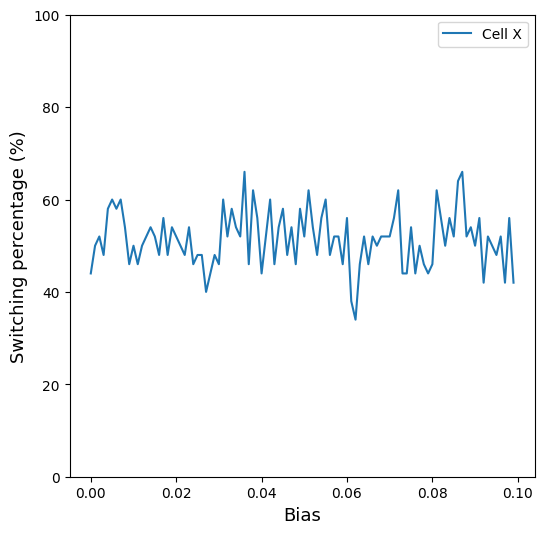

In [37]:
percentages = []
perc_y=[]
fig = plt.figure()
fig.set_size_inches(6,6)

for i in range(len(cell_x)):
  percent_x = (cell_x[i]/(cell_x[i]+cell_y[i]))*100
  percent_y=(cell_y[i]/(cell_x[i]+cell_y[i]))*100
  percentages.append(percent_x)
  perc_y.append(percent_y)
plt.plot(bs,percentages,'-',label='Cell X')

plt.ylim(0,100)
plt.xlabel('Bias',fontsize=13)
plt.ylabel('Switching percentage (%)',fontsize=13)
plt.legend()

**Observations:**
* The switching percentage to cell X decreases as bias increases.

**Results:**
* This implies a rise in bias favours cell Y.
* This is what we expected to happen when increasing bias.
* Earlier we
discussed how increasing bias moves the separatrix of the system so
that it is closer to stable node B.
* This means trajectories are more likely to flow towards stable node A, increasing the concentration of
cell Y.

# Investigating the switching time
* How does randomness and bias effect the switching time of the system?

**How do we measure this?**
* Run simulation 500 times.
* Record the switching time of each simulation.
* Plot box plot of distribution of switching times.

Let's first look at sigma..

In [28]:
# Define functions
def switching_time(xs,ys):
  """
  Switching time of a biological switch
  Defined as when the difference in cell concentrations > 0.6

  """
  if abs(xs-ys)>=0.6:
    return [xs,ys]
  else:
    return 0

def dW(delta_t):
    """Random sample normal distribution"""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

def f(X):
  return 1/(1+pow((X/0.3),3))

In [29]:
num_sims = 25

# One Second and thousand grid points
t_init = 0
t_end  = 15
N      = 10000
dt     = float(t_end - t_init) / N

## Initial Conditions
b = 0.01
mu    = 1
sigmas = np.arange(0,0.01,0.001)
ts = np.arange(t_init, t_end + dt, dt)

In [30]:
results ={}
for k in range(len(sigmas)):
  ys = np.zeros(N + 1)
  xs = np.zeros(N + 1)
  switching_times=[]
  for _ in range(num_sims):
    count = 0
    for i in range(1, ts.size):
      t = (i - 1) * dt
      y = ys[i - 1]
      x = xs[i-1]
          # Milstein method
      xs[i] = x + (-mu*x+ (1-b)*f(y))* dt + sigmas[k]*x*dW(dt) + 0.5* sigmas[k]**2 * x* (dW(dt)**2 - dt)
      ys[i] = y + (-mu*y + f(x))* dt + sigmas[k]*y*dW(dt) + 0.5* sigmas[k]**2 * y* (dW(dt)**2 - dt)
      s_t = switching_time(xs[i],ys[i])
      if s_t !=0 and count==0:
        #plt.axvline(x = t, color = 'b',label='Time to switch')
        switching_times.append(t)
        count+=1
    switching_times.sort()
    name = round(sigmas[k],4)
    results[str(name)]=switching_times

Text(0, 0.5, 'Switching time')

<Figure size 800x600 with 0 Axes>

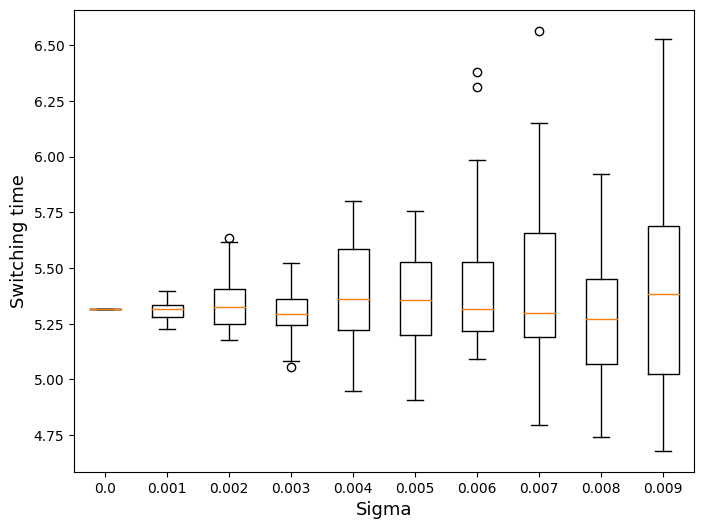

In [31]:
fig = plt.figure()
fig.set_size_inches(8,6)

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.boxplot(results.values())
ax.set_xticklabels(results.keys())
plt.xlabel('Sigma',fontsize=13)
plt.ylabel('Switching time',fontsize=13)

**Observations:**
* Mean switching time stays around 5.3.
* Variation of switching time increases as sigma increases.

**Results:**
* Increasing sigma effects the variation of switching time, but not the mean switching time.

In [32]:
num_sims = 25

# One Second and thousand grid points
t_init = 0
t_end  = 15
N      = 10000
dt     = float(t_end - t_init) / N

## Initial Conditions
bs = np.arange(0,0.1,0.001)
mu    = 1
sigma = 0.01
ts = np.arange(t_init, t_end + dt, dt)

In [33]:
results ={}
for k in range(len(bs)):
  ys = np.zeros(N + 1)
  xs = np.zeros(N + 1)
  switching_times=[]
  for _ in range(num_sims):
    count = 0
    for i in range(1, ts.size):
      t = (i - 1) * dt
      y = ys[i - 1]
      x = xs[i-1]
          # Milstein method
      xs[i] = x + (-mu*x+ (1-bs[k])*f(y))* dt + sigma*x*dW(dt) + 0.5* sigma**2 * x* (dW(dt)**2 - dt)
      ys[i] = y + (-mu*y + f(x))* dt + sigma*y*dW(dt) + 0.5* sigma**2 * y* (dW(dt)**2 - dt)
      s_t = switching_time(xs[i],ys[i])
      if s_t !=0 and count==0:
        #plt.axvline(x = t, color = 'b',label='Time to switch')
        switching_times.append(t)
        count+=1
    switching_times.sort()
    name = round(bs[k],4)
    results[str(name)]=switching_times

Text(0, 0.5, 'Switching time')

<Figure size 800x600 with 0 Axes>

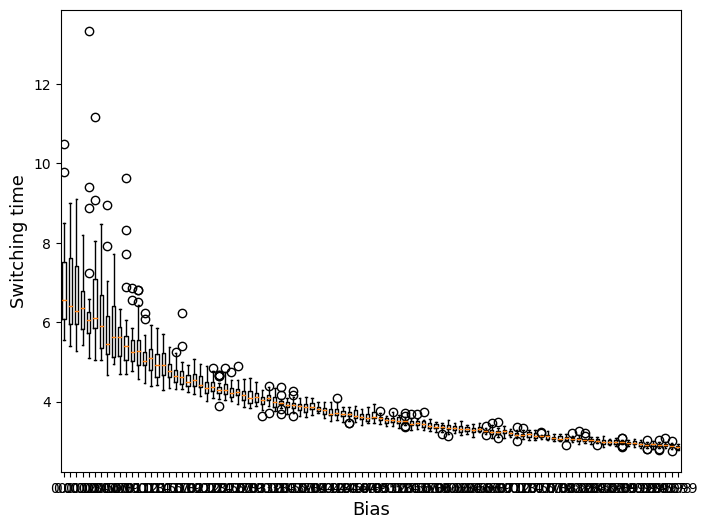

In [34]:
fig = plt.figure()
fig.set_size_inches(8,6)

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.boxplot(results.values())
ax.set_xticklabels(results.keys())
plt.xlabel('Bias',fontsize=13)
plt.ylabel('Switching time',fontsize=13)

**Observations:**
* Mean switching time decreases slightly as increase bias.
* Variation also decreases slightly.
* Overall range of switching time is still relatively small.


#Conclusion

From this investigation into the end point and switching
time of a stochastic system, some interesting results are gathered:
* The starting point of the system is important to switching. A system
with higher bias means the predictability of the switch increases as
there is a preference between cells.
* Random noise overrides the effect of bias by erasing any prior in-
formation from its starting point.
Hence, switching becomes random.
* When the final outcome of the switch is more predictable, this does
not increase the decision-making speed of the system.
* Higher noise causes the size of fluctuations to grow, which causes the
system to fluctuate across the separatrix in larger ranges. In some
cases, this can cause the system to switch faster. In other cases,
the effect of these larger fluctuations can cause the system to switch
slower.
